In [21]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from collections import defaultdict

Question 1

In [4]:
# Load the dataset
file_path = "D:\TU_Delft_technischenatuurkunde\Master\complex networks\SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Create an undirected graph from the dataset
G = nx.Graph()

# Add edges, ignoring time steps
edges = df[['id1', 'id2']].drop_duplicates().values.tolist()
G.add_edges_from(edges)

# 1. Number of nodes (N)
N = len(G.nodes())

# 2. Number of links (L)
L = len(G.edges())

# 3. Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# 4. Compute the average degree E[D]
E_D = np.mean(degrees)

# 5. Compute the standard deviation of the degree sqrt(Var[D])
std_D = np.std(degrees)

# Print results
print("Number of nodes (N):", N)
print("Number of links (L):", L)
print("Average degree (E[D]):", E_D)
print("Standard deviation of the degree (sqrt(Var[D])):", std_D)



<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Hp\AppData\Local\Temp\ipykernel_23512\2278870171.py:2: SyntaxWarning: invalid escape sequence '\T'
  file_path = "D:\TU_Delft_technischenatuurkunde\Master\complex networks\SFHH2025.xlsx"


Number of nodes (N): 401
Number of links (L): 9415
Average degree (E[D]): 46.957605985037404
Standard deviation of the degree (sqrt(Var[D])): 29.918521078014955


Question 2 

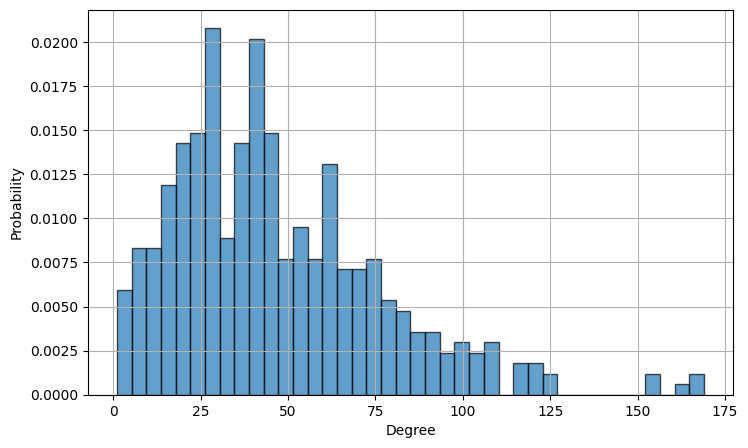

In [11]:
# Plot the degree distribution with probability on the y-axis
plt.figure(figsize=(10-10/6, 5))
plt.hist(degrees, bins=40, density=True, edgecolor='black', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Probability')
# plt.title('Degree Distribution')
plt.grid(True)
plt.show()

Question 3

In [12]:
# Calculate the degree correlation (assortativity)
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {assortativity}")

Degree Assortativity Coefficient: -0.08190596963063947


Question 4

In [13]:
# Calculate the global clustering coefficient (transitivity)
global_clustering_coefficient = nx.transitivity(G)
print(f"Global Clustering Coefficient (Transitivity): {global_clustering_coefficient}")

# Calculate the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

Global Clustering Coefficient (Transitivity): 0.23525635371029238
Average Clustering Coefficient: 0.2812358620467742


Question 5


In [14]:
# Calculate the average hopcount E[H] of the shortest paths between all node pairs
average_shortest_path_length = nx.average_shortest_path_length(G)
print(f"Average Hopcount E[H]: {average_shortest_path_length}")

# Calculate the diameter Hmax of the graph
diameter = nx.diameter(G)
print(f"Diameter Hmax: {diameter}")

Average Hopcount E[H]: 1.9547007481296759
Diameter Hmax: 4


Question 6

In [16]:
#lecture formula for ER network
average_hopcount = np.log(N) / np.log(E_D - 1)
print(average_hopcount)

1.5659354460489625


Question 7a

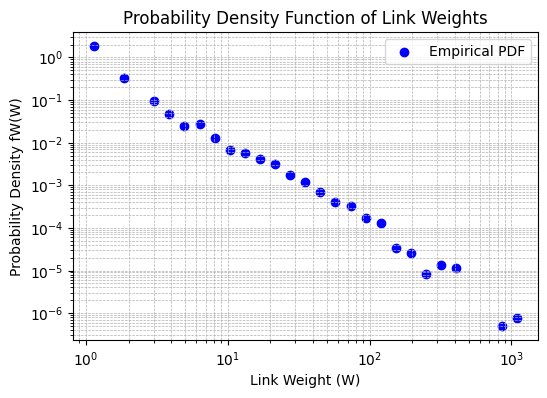

In [40]:
# Extract the link weights from the dataset
weights = df.groupby(['id1', 'id2']).size().values  # Counts occurrences per (id1, id2) pair

# Define binning strategy: Use logarithmic bins for better power-law visibility
bins = np.logspace(np.log10(min(weights)), np.log10(max(weights)), num=30)

# Compute histogram
hist, bin_edges = np.histogram(weights, bins=bins, density=True)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.figure(figsize=(6,4))
plt.scatter(bin_centers, hist, marker='o', label="Empirical PDF", color="blue")

# Log-log scale for power-law analysis
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Link Weight (W)")
plt.ylabel("Probability Density fW(W)")
plt.title("Probability Density Function of Link Weights")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


Calculating best minimal value for power law fit


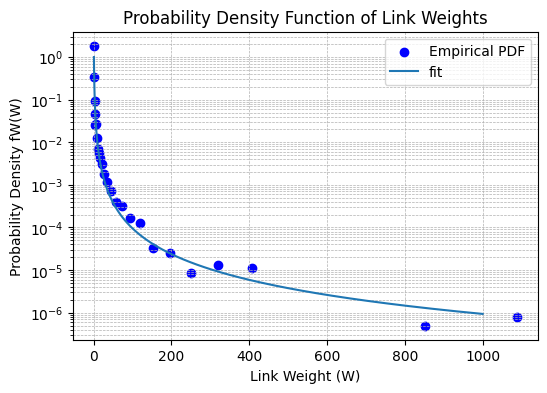

In [30]:
import powerlaw

# Fit power-law model
fit = powerlaw.Fit(weights)

# Get exponent alpha
alpha = fit.power_law.alpha

xvalues = np.logspace(0,3,100)
yvalues = xvalues**-(alpha-0.6)

plt.figure(figsize=(6,4))
plt.scatter(bin_centers, hist, marker='o', label="Empirical PDF", color="blue")
plt.plot(xvalues,yvalues, label= 'fit')

# Log-log scale for power-law analysis
# plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Link Weight (W)")
plt.ylabel("Probability Density fW(W)")
plt.title("Probability Density Function of Link Weights")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

Question 7B

In [22]:
# Load the temporal network data
# Assuming Gdata is a list of tuples (time, node_i, node_j)
Gdata = df[['id1', 'id2', 'time_step']].values.tolist()

N = G.number_of_nodes()  # Number of nodes
T = 3493  # Last time step

def simulate_spreading(seed, Gdata, T):
    infected = set([seed])
    I_t = np.zeros(T + 1)
    I_t[0] = 1  # Seed is infected at t=0

    contacts = defaultdict(list)
    for node_i, node_j, time in Gdata:
        contacts[time].append((node_i, node_j))

    for t in range(1, T + 1):
        new_infected = set()
        for node_i, node_j in contacts[t]:
            if node_i in infected and node_j not in infected:
                new_infected.add(node_j)
            elif node_j in infected and node_i not in infected:
                new_infected.add(node_i)
        infected.update(new_infected)
        I_t[t] = len(infected)

    return I_t

# Run simulations
all_I_t = np.zeros((N, T + 1))
for seed in range(N):
    all_I_t[seed] = simulate_spreading(seed, Gdata, T)



Question 8

In [23]:
# Calculate average and standard deviation
E_I_t = np.mean(all_I_t, axis=0)
Var_I_t = np.std(all_I_t, axis=0)

print(E_I_t, Var_I_t)

[  1.           1.00498753   1.00498753 ... 397.27182045 397.27182045
 397.27182045] [ 0.          0.07044612  0.07044612 ... 20.54162926 20.54162926
 20.54162926]


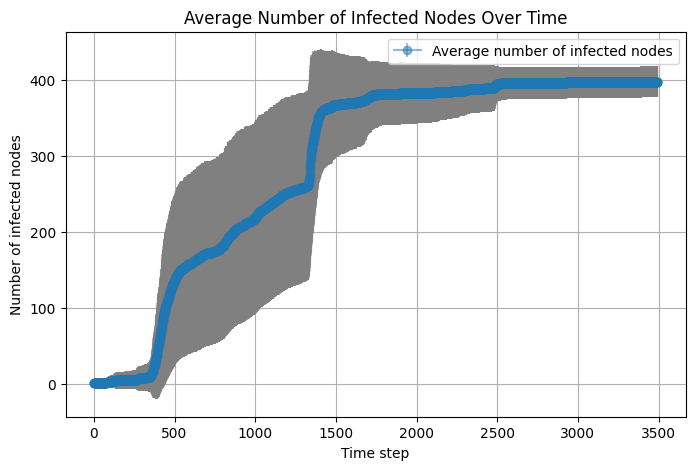

In [33]:
# Plot the average number of infected nodes with error bars
plt.figure(figsize=(8, 5))
plt.errorbar(range(T + 1), E_I_t, yerr=Var_I_t, fmt='-o', label='Average number of infected nodes', ecolor='gray', alpha=0.5)
plt.xlabel('Time step')
plt.ylabel('Number of infected nodes')
plt.title('Average Number of Infected Nodes Over Time')
plt.legend()
plt.grid(True)
plt.show()

Question 9

In [29]:
# Calculate the time to infect 80% of the nodes for each seed
time_to_infect_80 = np.full(N, T + 1) 
threshold = N * 0.8 # Initialize with a value greater than T
for seed in range(N):
    I_t = simulate_spreading(seed, Gdata, T)
    if np.any(I_t >= threshold):
        time_to_infect_80[seed] = np.argmax(I_t >= threshold)

# Rank the nodes based on the time to infect 80% of the nodes
ranked_nodes = np.argsort(time_to_infect_80)
R = ranked_nodes + 1  # Node indices start from 1

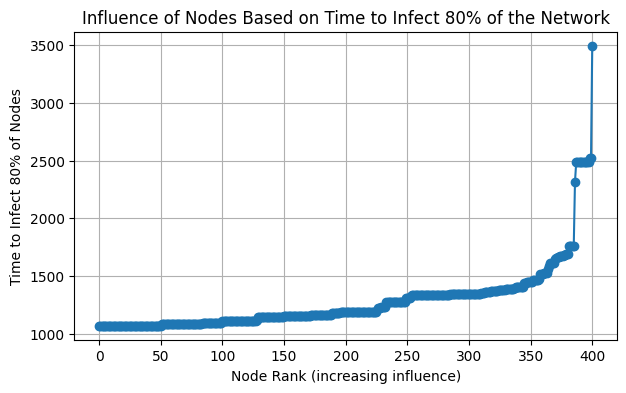

In [36]:
# Plot the time to infect 80% of the nodes in increasing order
plt.figure(figsize=(7, 4))
plt.plot(np.sort(time_to_infect_80), marker='o')
plt.xlabel('Node Rank (increasing influence)')
plt.ylabel('Time to Infect 80% of Nodes')
plt.title('Influence of Nodes Based on Time to Infect 80% of the Network')
plt.grid(True)
plt.show()

# Print the ranking vector R
# print("Ranking vector R:", R)


Question 10

In [ ]:

def calc_rates (f,n=1000):
   

# Rank the nodes based on the time to infect 80% of the nodes
    ranked_nodes = np.argsort(time_to_infect_80)
    R = ranked_nodes + 1  # Node indices start from 1

In [56]:
# Count contacts (weights) for each pair
edge_counts = df.groupby(['id1', 'id2']).size().reset_index(name='weight')

# Add edges with weights to the graph
for _, row in edge_counts.iterrows():
    G.add_edge(row['id1'], row['id2'], weight=row['weight'])

# Compute the degree and strength of each node
degree_dict = dict(G.degree(weight=None))
strength_dict = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}

def calc_rates(f, n=1000):
    N = len(G.nodes())  # Number of nodes
    num_top_nodes = int(f * N)
    all_R = []
    all_D = []
    all_S = []
    r_RD_f = []
    r_RS_f = []

    for _ in range(n):
        # Shuffle the nodes with the same infection time
        unique_times = np.unique(time_to_infect_80)
        shuffled_nodes = np.array(range(N))
        
        for time in unique_times:
            same_time_nodes = np.where(time_to_infect_80 == time)[0]
            np.random.shuffle(same_time_nodes)
            shuffled_nodes[same_time_nodes] = same_time_nodes

        # Rank the nodes based on the time to infect 80% of the nodes
        ranked_nodes = np.argsort(time_to_infect_80[shuffled_nodes])
        R = shuffled_nodes[ranked_nodes]

        # Store the shuffled vector R
        all_R.append(R)

        # Rank the nodes based on degree and strength
        D_sorted = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
        S_sorted = sorted(strength_dict.items(), key=lambda x: x[1], reverse=True)

        D = [node for node, _ in D_sorted]
        S = [node for node, _ in S_sorted]

        # Store the ordered vectors D and S
        all_D.append(D)
        all_S.append(S)

        # Calculate the top f sets
        Rf = set(R[:num_top_nodes])
        Df = set(D[:num_top_nodes])
        Sf = set(S[:num_top_nodes])

        # Calculate the recognition rates
        r_RD_f.append(len(Rf.intersection(Df)) / num_top_nodes)
        r_RS_f.append(len(Rf.intersection(Sf)) / num_top_nodes)

    # Calculate the average recognition rates
    avg_r_RD_f = np.mean(r_RD_f)
    avg_r_RS_f = np.mean(r_RS_f)

    # Return the average recognition rates
    return avg_r_RD_f, avg_r_RS_f


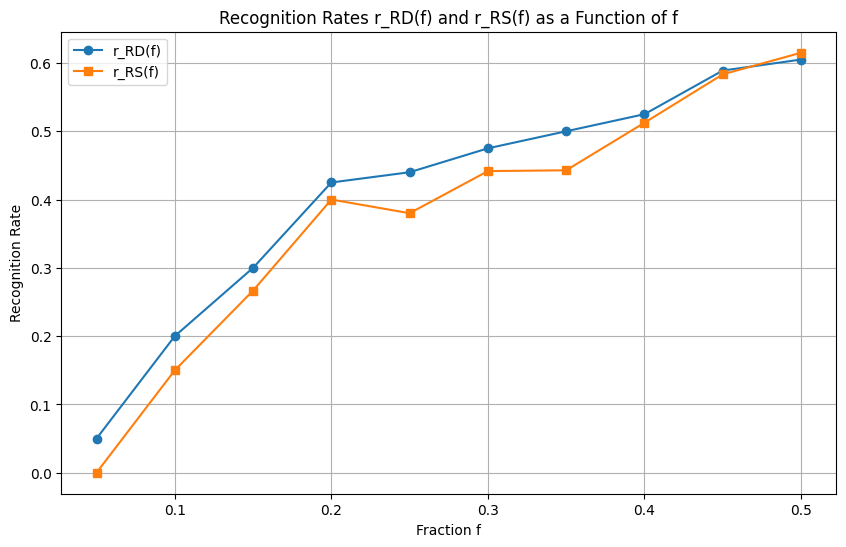

In [57]:
f_values = np.arange(0.05, 0.55, 0.05)
r_RD_f_values = []
r_RS_f_values = []

for f in f_values:
    r_RD_f, r_RS_f = calc_rates(f)
    r_RD_f_values.append(r_RD_f)
    r_RS_f_values.append(r_RS_f)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(f_values, r_RD_f_values, marker='o', label='r_RD(f)')
plt.plot(f_values, r_RS_f_values, marker='s', label='r_RS(f)')
plt.xlabel('Fraction f')
plt.ylabel('Recognition Rate')
plt.title('Recognition Rates r_RD(f) and r_RS(f) as a Function of f')
plt.legend()
plt.grid(True)
plt.show()

Question 11
